# Recognizing Hand-Written Digits with KNN

## Importing and Exploring Data

In [50]:
from sklearn.datasets import fetch_openml # a method that replaces fetch_mldata in newer versions of scikit-learn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import neighbors
import matplotlib.pyplot as plt

The "MNIST" dataset is a widely used benchmark dataset in the field of machine learning and computer vision. 

It stands for "Modified National Institute of Standards and Technology" database.

The "784" in "mnist_784" refers to the dimensionality of the dataset; each image in the MNIST dataset is a 28x28 grayscale image, which is flattened into a vector of 784 elements.

In [51]:
mnist = fetch_openml('mnist_784', parser='auto') # mnist_784 in fetch_openml instead of MNIST original in fetch_mldata

### data: 

The images in the MNIST dataset are represented as arrays of size 28 x 28, totaling 784 elements, where each element corresponds to a grayscale pixel. 

That means the color of each pixel is represented by a number between 0 and 16 (0 = white, 16 = black)

In [52]:
# Print dataset features: contains the input features (pixel values) of the images
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### target: 

The annotations (from 1 to 9) correspond to the "read" value of the digit.

In [53]:
# Print dataset targets : contains the corresponding labels (digits)
mnist.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

## Sampling

In [54]:
sample = np.random.randint(70000, size= 5000)
data = mnist.data.values[sample]
target = mnist.target[sample]
data.shape, target.shape

((5000, 784), (5000,))

## Training & Testing

In [55]:
x_train, x_test, y_train, y_test = train_test_split(data, target, train_size=0.8)

### Choose the best K (that generates the minimum error)

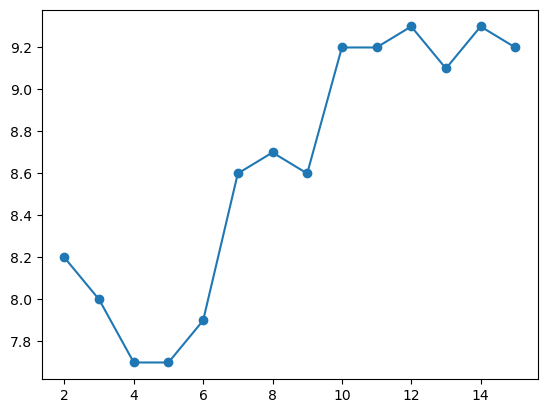

In [56]:
errors=[]
for k in range (2, 16):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    errors.append(100*(1-knn.score(x_test, y_test)))
plt.plot(range(2, 16), errors, 'o-')
plt.show()

The most efficient K-NN is the one that has k=3.

So the final optimal classifier is 3-NN

## Visualize Some Predictions

In [57]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [58]:
# convert data into images
images = x_test.reshape(-1, 28, 28)

The first dimension (-1) is inferred based on the length of the input data, effectively preserving the number of samples.

The second and third dimensions (28, 28) represent the height and width of each image, respectively.

In [59]:
# randomly select 12 images
select = np.random.randint(images.shape[0], size= 12)

"images.shape[0]" = the number of images in the images array.

"select" will be an array containing 12 random indices, which can be used to select a subset of 12 images from the images array.

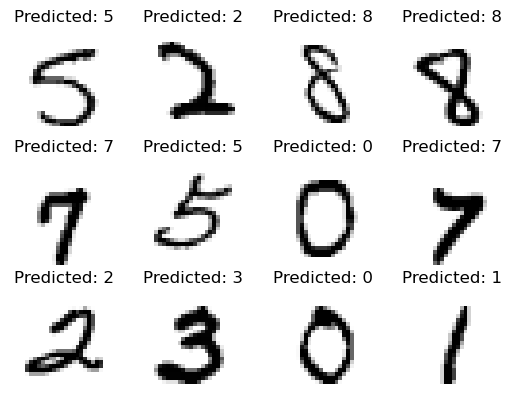

In [60]:
# predict on test set
predicted = knn.predict(x_test)

# display images with relative predictions
for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: %i' % int(predicted[value]))
plt.show()